In [1]:
!pip -q install timesfm
import timesfm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 771.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.1 MB/s eta 0:00:00
 See https://github.com/google-research/timesfm/blob/master/README.md for updated APIs.
Loaded PyTorch TimesFM, likely because python version is 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0].


In [2]:
from google.colab import files
uploaded =files.upload()

Saving 2001.csv to 2001.csv


In [38]:
import pandas as pd
data=pd.read_csv('2001.csv')  #https://raw.githubusercontent.com/Mujtaba-Khawari/data-csv/main/2001.csv"
data.head()

,DATA,FLOW
0,1/1/2001,6.45
1,1/2/2001,6.45
2,1/2/2001,5.40
3,1/2/2001,4.62
4,1/3/2001,6.18


In [60]:
data['DATE']=pd.to_datetime(data['DATA'])
data.head()

,DATA,FLOW,DATE
0,1/1/2001,6.45,2001-01-01
1,1/2/2001,6.45,2001-01-02
2,1/2/2001,5.40,2001-01-02
3,1/2/2001,4.62,2001-01-02
4,1/3/2001,6.18,2001-01-03


In [67]:
df = pd.DataFrame({'unique_id':[1]*len(data),'ds': data["DATE"], "y":data['FLOW']})
df.head(10)
len(df)

1689

In [64]:
split_idx = int(len(df) * 0.94)
print((split_idx))
train_df = df[:split_idx]
test_df = df[split_idx:]
print(train_df.shape, test_df.shape)

1587
(1587, 3) (102, 3)


In [46]:
tfm = timesfm.TimesFm(
    hparams=timesfm.TimesFmHparams(
    context_len=512,
    horizon_len=102,
    input_patch_len=32,  #32 ORGINAL
    output_patch_len=128, #128 ORGINAL
    num_layers=20,
    model_dims=1280,
    backend="gpu",
),
    checkpoint=timesfm.TimesFmCheckpoint(
           huggingface_repo_id="google/timesfm-1.0-200m-pytorch"),
)

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

In [55]:
# Forecasting the values using the TimesFM model
timesfm_forecast = tfm.forecast_on_df(
   inputs=train_df,       # Input training data for training
   freq="MS",             # Frequency of the time-series data
   value_name="y",        # Name of the column containing the values to be forecasted
   num_jobs=-1,           # Set to -1 to use all available cores
)
timesfm_forecast.head(10)

Processing dataframe with multiple processes.
Finished preprocessing dataframe.
Finished forecasting.


,unique_id,ds,timesfm,timesfm-q-0.1,timesfm-q-0.2,timesfm-q-0.3,timesfm-q-0.4,timesfm-q-0.5,timesfm-q-0.6,timesfm-q-0.7,timesfm-q-0.8,timesfm-q-0.9
0,1,2001-12-01,8.166008,6.434785,7.058027,7.414422,7.836241,8.166008,8.429998,8.872612,9.446365,10.307436
1,1,2002-01-01,7.827804,5.853716,6.501314,6.969885,7.421718,7.827804,8.247200,8.790989,9.370966,10.369385
2,1,2002-02-01,7.898256,5.620405,6.504495,6.973716,7.524949,7.898256,8.415250,9.084476,9.728638,10.873323
3,1,2002-03-01,8.081877,5.648056,6.370471,7.018315,7.476264,8.081877,8.636305,9.115521,9.853203,11.163240
4,1,2002-04-01,7.946762,5.486505,6.204823,6.884634,7.508853,7.946762,8.424483,9.115726,9.888865,11.336643
5,1,2002-05-01,7.630162,5.200488,6.068707,6.625886,7.176586,7.630162,8.319613,8.738361,9.560938,11.111809
6,1,2002-06-01,7.275171,4.802205,5.513725,6.188960,6.759621,7.275171,7.712666,8.260456,9.204840,10.696556
7,1,2002-07-01,7.149874,4.566848,5.506625,6.080700,6.701251,7.149874,7.678685,8.287896,9.010252,10.785286
8,1,2002-08-01,7.136158,4.630538,5.435525,6.127461,6.761199,7.136158,7.690902,8.273464,9.265679,11.042864
9,1,2002-09-01,7.581810,4.703958,5.671143,6.433306,6.907941,7.581810,8.069263,8.751278,9.770460,11.695400


In [53]:
timesfm_forecast = timesfm_forecast[["ds","timesfm"]]
timesfm_forecast.head()
timesfm_forecast.tail(10)

,ds,timesfm
92,2009-08-01,10.173710
93,2009-09-01,10.250317
94,2009-10-01,10.068882
95,2009-11-01,10.372194
96,2009-12-01,10.299866
97,2010-01-01,10.568247
98,2010-02-01,10.661785
99,2010-03-01,10.718899
100,2010-04-01,10.633160
101,2010-05-01,10.816099


In [49]:
import numpy as np

def mse(y_pred, y_true):
  y_pred = np.array(y_pred)
  y_true = np.array(y_true)
  return np.mean(np.square(y_pred - y_true))

def mae(y_pred, y_true):
  y_pred = np.array(y_pred)
  y_true = np.array(y_true)
  return np.mean(np.abs(y_pred - y_true))

def rmse(y_pred, y_true):
  y_pred = np.array(y_pred)
  y_true = np.array(y_true)
  return np.sqrt(np.mean((y_true - y_pred)**2))

In [18]:
len(timesfm_forecast['timesfm']), len(test_df['y'])

(24, 102)

In [50]:
print(f"Mean Absolute Error (MAE): {mae(timesfm_forecast['timesfm'], test_df['y'])}")
print(f"Mean Squared Error (MSE): {mse(timesfm_forecast['timesfm'], test_df['y'])}")
print(f"Root Mean Squared Error (RMSE): {rmse(timesfm_forecast['timesfm'], test_df['y'])}")

Mean Absolute Error (MAE): 7.523511365815705
Mean Squared Error (MSE): 74.6424434610357
Root Mean Squared Error (RMSE): 8.639585838513076


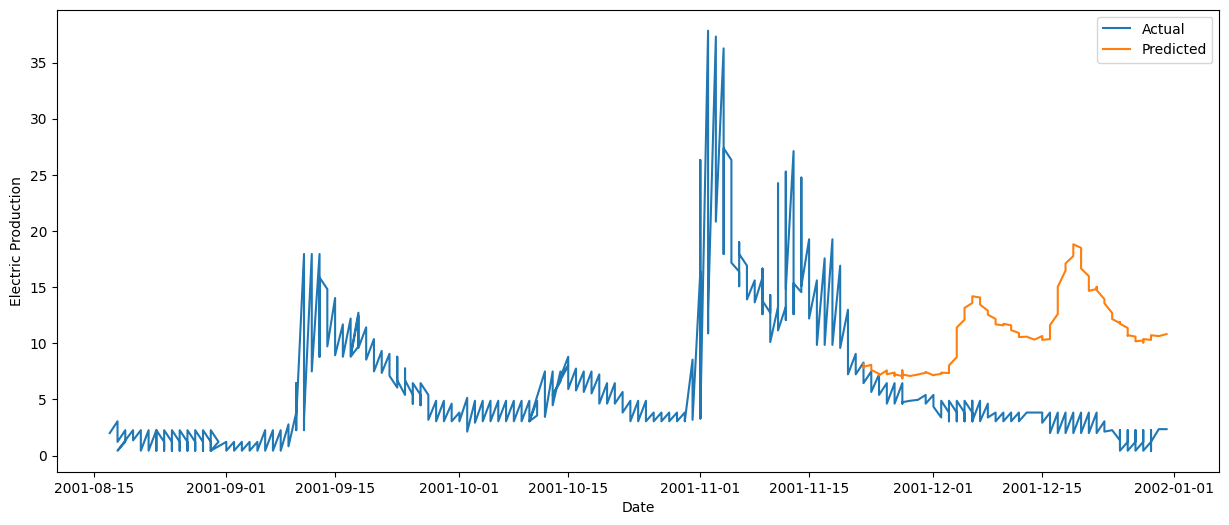

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(df["ds"][1075:], df["y"][1075:], label="Actual")
plt.plot(df["ds"][split_idx:], timesfm_forecast["timesfm"], label="Predicted") #here some changes
plt.ylabel('Electric Production')
plt.xlabel('Date')
plt.legend()
plt.show()


# Covariates

Let's take a toy example of forecasting sales for a grocery store:

**Task:** Given the observed the daily sales of this week (7 days), forecast the daily sales of next week (7 days).

```
Product: ice cream
Daily_sales: [30, 30, 4, 5, 7, 8, 10]
Category: food
Base_price: 1.99
Weekday: [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]
Has_promotion: [Yes, Yes, No, No, No, Yes, Yes, No, No, No, No, No, No, No]
Daily_temperature: [31.0, 24.3, 19.4, 26.2, 24.6, 30.0, 31.1, 32.4, 30.9, 26.0, 25.0, 27.8, 29.5, 31.2]
```

```
Product: sunscreen
Daily_sales: [5, 7, 12, 13, 5, 6, 10]
Category: skin product
Base_price: 29.99
Weekday: [0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6]
Has_promotion: [No, No, Yes, Yes, No, No, No, Yes, Yes, Yes, Yes, Yes, Yes, Yes]
Daily_temperature: [31.0, 24.3, 19.4, 26.2, 24.6, 30.0, 31.1, 32.4, 30.9, 26.0, 25.0, 27.8, 29.5, 31.2]
```

In this example, besides the `Daily_sales`, we also have covariates `Category`, `Base_price`, `Weekday`, `Has_promotion`, `Daily_temperature`. Let's introduce some concepts:

**Static covariates** are covariates for each time series.
- In our example, `Category` is a **static categorical covariate**,
- `Base_price` is a **static numerical covariates**.

**Dynamic covariates** are covaraites for each time stamps.
- Date / time related features can be usually treated as dynamic covariates.
- In our example, `Weekday` and `Has_promotion` are **dynamic categorical covariates**.
- `Daily_temperate` is a **dynamic numerical covariate**.

**Notice:** Here we make it mandatory that the dynamic covariates need to cover both the forecasting context and horizon. For example, all dynamic covariates in the example have 14 values: the first 7 correspond to the observed 7 days, and the last 7 correspond to the next 7 days.

In [ ]:
df["month"] = df['ds'].dt.strftime('%B')
df.head()

,unique_id,ds,y,month
0,1,1985-01-01,72.5052,January
1,1,1985-02-01,70.6720,February
2,1,1985-03-01,62.4502,March
3,1,1985-04-01,57.4714,April
4,1,1985-05-01,55.3151,May


In [ ]:
forecast_input = [df["y"][:-24]]
len(df["y"])

397

In [ ]:
dynamic_categorical_covariates = {"month": [df["month"]]}
len(df["month"])

397

In [ ]:
# Call the forecast_with_covariates function
test_forecast, _ = tfm.forecast_with_covariates(
    forecast_input,
    #dynamic_numerical_covariates=dynamic_numerical_covariates,
    dynamic_categorical_covariates=dynamic_categorical_covariates,
    #static_numerical_covariates=static_numerical_covariates,
    #static_categorical_covariates=static_categorical_covariates,
    #freq=[0],
    xreg_mode="xreg + timesfm",
    ridge=0.0,
    force_on_cpu=False,
    normalize_xreg_target_per_input=True
)

test_forecast = np.array(test_forecast)  # Convert list to NumPy array

In [ ]:
print(f"Mean Absolute Error (MAE): {mae(test_forecast, test_df['y'])}")
print(f"Mean Squared Error (MSE): {mse(test_forecast, test_df['y'])}")
print(f"Root Mean Squared Error (RMSE): {rmse(test_forecast, test_df['y'])}")

Mean Absolute Error (MAE): 3.4381066026667964
Mean Squared Error (MSE): 21.691509929043168
Root Mean Squared Error (RMSE): 4.657414511189998


In [ ]:
forecast_input = [
    np.sin(np.linspace(0, 20, 512)),
    np.cos(np.linspace(0, 20, 512))
]
dynamic_numerical_covariates = {
    "temperature": [np.random.rand(536), np.random.rand(536)]
}
dynamic_categorical_covariates = {
    "weekday": [np.random.randint(0, 7, 536), np.random.randint(0, 7, 536)]
}
static_numerical_covariates = {
    "base_price": [10.5, 15.0]
}
static_categorical_covariates = {
    "category": ["food", "beverage"]
}


In [ ]:


test_forecast, _ = tfm.forecast_with_covariates(
    forecast_input,
    dynamic_numerical_covariates=dynamic_numerical_covariates,
    dynamic_categorical_covariates=dynamic_categorical_covariates,
    static_numerical_covariates=static_numerical_covariates,
    static_categorical_covariates=static_categorical_covariates,
    freq=[0, 0],
    xreg_mode="xreg + timesfm",
    ridge=0.0,
    force_on_cpu=False,
    normalize_xreg_target_per_input=True
)

test_forecast = np.array(test_forecast)  # Convert list to NumPy array

print("Test forecast shape:", test_forecast.shape)
print("First batch test forecast first 5 values:", test_forecast[0][:5])
print("Second batch test forecast first 5 values:", test_forecast[1][:5])

Test forecast shape: (2, 24)
First batch test forecast first 5 values: [0.86623711 0.93557316 0.90128734 0.97532904 0.86987447]
Second batch test forecast first 5 values: [0.3440426  0.35192877 0.17808227 0.21502837 0.13915725]
